In [58]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras_facenet import FaceNet
from dnn_face_detection import detect_face
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
img1=cv2.imread("dataset/p1.png")
img2=cv2.imread("dataset/p2.png")
img3=cv2.imread("dataset/pp.png")


In [60]:
def plot_img(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

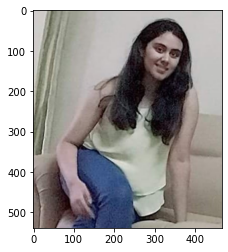

In [61]:
plot_img(img1)

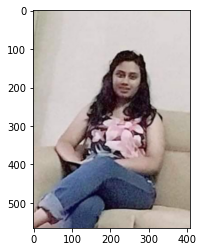

In [62]:
plot_img(img2)

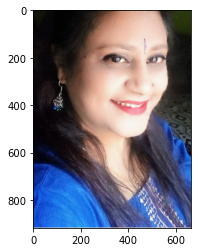

In [63]:
plot_img(img3)

In [64]:
def face_detection(img):
    faces=detect_face(img)
    print(faces)
    for bounding_box in faces:
        
        x=int(bounding_box[0])
        y=int(bounding_box[1])
        x2=int(bounding_box[2])
        y2=int(bounding_box[3])
        print(x,y,x2,y2)
        crop_face=img[y:y2,x:x2]
        crop_face=cv2.resize(crop_face,(160,160))
        return crop_face

In [65]:
face1 = face_detection(img1)

[[275.95  54.89 368.93 172.42]]
275 54 368 172


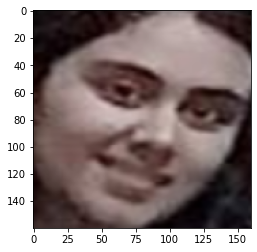

In [66]:
plot_img(face1)

In [67]:
face2= face_detection(img2)

[[203.17 131.81 279.03 229.3 ]]
203 131 279 229


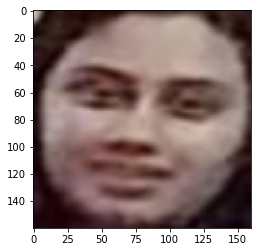

In [68]:
plot_img(face2)

In [69]:
embedder=FaceNet()

In [70]:
embeding1=embedder.embeddings(np.expand_dims(face1,axis=0))

1/1 [==============================] - 1s 1s/step


In [71]:
embeding1.shape

(1, 512)

In [72]:
embeding2=embedder.embeddings(np.expand_dims(face2,axis=0))

1/1 [==============================] - 0s 41ms/step


In [73]:
embeding2.shape

(1, 512)

In [74]:
similarity_score=cosine_similarity(embeding1,embeding2)

In [75]:
similarity_score

array([[0.6496374]], dtype=float32)

In [81]:
embeding3 = embedder.embeddings(np.expand_dims(face_detection(img3),axis=0))
embeding3.shape

[[167.17   1.67 574.51 527.47]]
167 1 574 527
1/1 [==============================] - 0s 58ms/step


(1, 512)

In [82]:
similarity_score=cosine_similarity(embeding1,embeding3)

In [83]:
similarity_score

array([[0.3601975]], dtype=float32)